In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from astropy.time import Time

In [2]:
plt.style.use('ggplot')

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('light_curves_181646914411688960_200261994165010176.csv')

In [13]:
df = df.loc[~(df['rejected_by_photometry'] | df['rejected_by_variability'])]

In [37]:
df['mag'] = df['mag'].astype(np.float32)
df['time'] = df['time'].astype(np.float32)

In [38]:
df.head(20)

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
1,181646914411688960,19240383064740421,G,1744.799194,15.713665,9769.679686,18.609422,524.98566,False,False,1,369295549951641967
2,181646914411688960,19250123867579313,G,1744.975342,15.703185,9864.433111,14.214431,693.97314,False,False,1,369295549951641967
3,181646914411688960,26786862375244063,G,1881.271729,15.706703,9832.526462,31.084255,316.31854,False,False,4097,369295549951641967
4,181646914411688960,28490402782028622,G,1912.076416,15.698725,9905.046149,13.649018,725.69660,False,False,1,369295549951641967
5,181646914411688960,28500143583032365,G,1912.252563,15.704646,9851.171780,19.163215,514.06680,False,False,1,369295549951641967
6,181646914411688960,29582661632963442,G,1931.827637,15.700907,9885.160912,23.578055,419.25260,False,False,1,369295549951641967
7,181646914411688960,37155635620495597,G,2068.783447,15.702921,9866.837702,26.593601,371.02300,False,False,4194817,369295549951641967
8,181646914411688960,39020736240423460,G,2102.516113,15.683480,10045.098472,20.588375,487.90146,False,False,1,369295549951641967
9,181646914411688960,39933314717586718,G,2119.020996,15.702918,9866.863251,20.805098,474.25220,False,False,1,369295549951641967
10,181646914411688960,39937406981030448,G,2119.094971,15.694860,9940.369208,17.065734,582.47534,False,False,4325889,369295549951641967


In [39]:
sources=df['source_id'].unique()

In [40]:
df['source_id'].value_counts().head()

184854434646126080    138
187839539996486272    137
188743269835075456    134
185342755247769728    134
185440268185699840    134
Name: source_id, dtype: int64

In [57]:
grouped = df.groupby(['source_id', 'band', 'time'])[['flux_over_error', 'mag']].first().reset_index()

In [58]:
grouped = grouped.loc[grouped['band'] == 'G']
grouped = grouped.drop('band', axis=1)

In [59]:
plot_data = grouped.loc[grouped['source_id'] == sources[108]]
# plot_data = plot_data.loc[plot_data['band'] == 'G']

In [60]:
grouped

,source_id,time,flux_over_error,mag
31,181646914411688960,1744.799194,524.98566,15.713665
32,181646914411688960,1744.975342,693.97314,15.703185
33,181646914411688960,1881.271729,316.31854,15.706703
34,181646914411688960,1912.076416,725.69660,15.698725
35,181646914411688960,1912.252563,514.06680,15.704646
...,...,...,...,...
84564,200261994165010176,2304.877686,234.54012,8.813420
84565,200261994165010176,2305.053711,187.36143,8.795822
84566,200261994165010176,2305.127686,262.39386,8.795105
84567,200261994165010176,2305.303955,284.19168,8.803472


In [55]:
plot_data

,source_id,time,flux_over_error
7781,184832959806617344,1711.162476,121.34244
7782,184832959806617344,1744.974243,548.74176
7783,184832959806617344,1745.048218,379.02615
7784,184832959806617344,1881.522095,445.47153
7785,184832959806617344,1881.596069,377.49615
7786,184832959806617344,1912.077515,265.86850
7787,184832959806617344,1932.254272,434.36390
7788,184832959806617344,1932.328247,131.96625
7789,184832959806617344,2068.782471,405.00443
7790,184832959806617344,2102.089600,381.38455


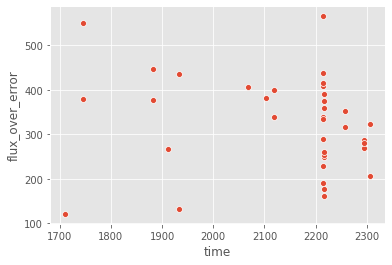

In [48]:
# sns.scatterplot(x='time', y='flux_over_error', data=plot_data)
sns.scatterplot(x='time', y='flux_over_error', data=plot_data)

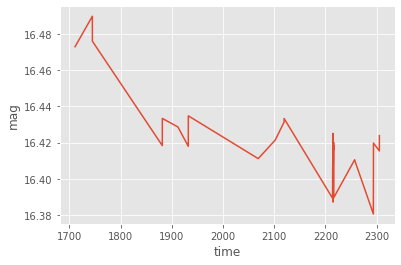

In [62]:
sns.lineplot(x='time', y='mag', data=plot_data)

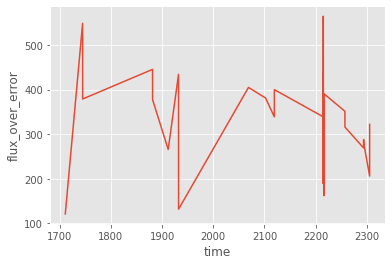

In [49]:
sns.lineplot(x='time', y='flux_over_error', data=plot_data)

In [50]:
plot_data

,source_id,time,flux_over_error
7781,184832959806617344,1711.162476,121.34244
7782,184832959806617344,1744.974243,548.74176
7783,184832959806617344,1745.048218,379.02615
7784,184832959806617344,1881.522095,445.47153
7785,184832959806617344,1881.596069,377.49615
7786,184832959806617344,1912.077515,265.86850
7787,184832959806617344,1932.254272,434.36390
7788,184832959806617344,1932.328247,131.96625
7789,184832959806617344,2068.782471,405.00443
7790,184832959806617344,2102.089600,381.38455


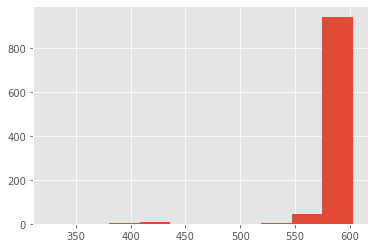

In [51]:
df.groupby('source_id')['time'].apply(lambda x: x.max() - x.min()).hist()

Max diff follows poisson distribution

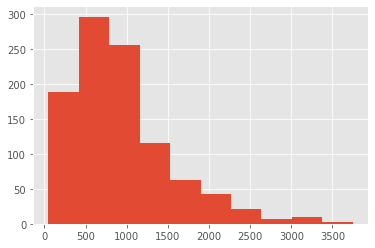

In [52]:
df.groupby('source_id')['flux_over_error'].apply(lambda x: x.max() - x.min()).hist()

In [53]:
df['other_flags'].value_counts()

0          55118
1          16700
4097        6126
4194817     2989
4198913     1005
           ...  
4014081        1
4385           1
7766017        1
4193           1
4765           1
Name: other_flags, Length: 263, dtype: int64

In [ ]:
df['source_id'].value_counts().hist()

In [ ]:
df['band'].value_counts()

In [ ]:
df['source_id'].value_counts().head()

In [25]:
src = df.loc[df['source_id'] == 184854434646126080]

In [26]:
src.sort_values(by='time', inplace=True)

/home/glenn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
src

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
9032,184854434646126080,17380585512157341,G,1711.162476,14.791303,22846.784826,24.928159,916.50510,False,False,4194817,369295549951641967
9080,184854434646126080,17380585512157341,BP,1711.162720,15.282809,10652.015753,124.792369,85.35791,False,False,0,369295549951641967
9127,184854434646126080,17380585512157341,RP,1711.162842,14.117023,18111.689433,141.276072,128.20068,False,False,0,369295549951641967
9081,184854434646126080,19240322461372875,BP,1744.798340,15.295649,10526.780632,100.525953,104.71704,False,False,0,369295549951641967
9128,184854434646126080,19240322461372875,RP,1744.798462,14.117555,18102.805666,128.678744,140.68217,False,False,0,369295549951641967
...,...,...,...,...,...,...,...,...,...,...,...,...
9125,184854434646126080,50234160359290702,BP,2305.299316,15.280589,10673.817851,109.641271,97.35219,False,False,0,369295549951641967
9171,184854434646126080,50234160359290702,RP,2305.299316,14.116655,18117.819594,137.591944,131.67792,False,False,0,369295549951641967
9079,184854434646126080,50238252676855330,G,2305.373047,14.784592,22988.436333,27.081270,848.86847,False,False,1,369295549951641967
9126,184854434646126080,50238252676855330,BP,2305.373291,15.280304,10676.621424,114.736023,93.05379,False,False,0,369295549951641967


In [28]:
times = src['time'].values

In [29]:
times = Time(times, format='mjd')

In [30]:
# times.utc.iso

In [31]:
src['utc'] = times.utc.iso

/home/glenn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
src

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id,utc
9032,184854434646126080,17380585512157341,G,1711.162476,14.791303,22846.784826,24.928159,916.50510,False,False,4194817,369295549951641967,1863-07-25 03:53:57.891
9080,184854434646126080,17380585512157341,BP,1711.162720,15.282809,10652.015753,124.792369,85.35791,False,False,0,369295549951641967,1863-07-25 03:54:18.984
9127,184854434646126080,17380585512157341,RP,1711.162842,14.117023,18111.689433,141.276072,128.20068,False,False,0,369295549951641967,1863-07-25 03:54:29.531
9081,184854434646126080,19240322461372875,BP,1744.798340,15.295649,10526.780632,100.525953,104.71704,False,False,0,369295549951641967,1863-08-27 19:09:36.563
9128,184854434646126080,19240322461372875,RP,1744.798462,14.117555,18102.805666,128.678744,140.68217,False,False,0,369295549951641967,1863-08-27 19:09:47.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,184854434646126080,50234160359290702,BP,2305.299316,15.280589,10673.817851,109.641271,97.35219,False,False,0,369295549951641967,1865-03-10 07:11:00.938
9171,184854434646126080,50234160359290702,RP,2305.299316,14.116655,18117.819594,137.591944,131.67792,False,False,0,369295549951641967,1865-03-10 07:11:00.938
9079,184854434646126080,50238252676855330,G,2305.373047,14.784592,22988.436333,27.081270,848.86847,False,False,1,369295549951641967,1865-03-10 08:57:11.250
9126,184854434646126080,50238252676855330,BP,2305.373291,15.280304,10676.621424,114.736023,93.05379,False,False,0,369295549951641967,1865-03-10 08:57:32.344


In [ ]:
plot_data = src[src['band'].isin(['BP','RP'])]

In [36]:
src

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id,utc
9032,184854434646126080,17380585512157341,G,1711.162476,14.791303,22846.784826,24.928159,916.50510,False,False,4194817,369295549951641967,1863-07-25 03:53:57.891
9080,184854434646126080,17380585512157341,BP,1711.162720,15.282809,10652.015753,124.792369,85.35791,False,False,0,369295549951641967,1863-07-25 03:54:18.984
9127,184854434646126080,17380585512157341,RP,1711.162842,14.117023,18111.689433,141.276072,128.20068,False,False,0,369295549951641967,1863-07-25 03:54:29.531
9081,184854434646126080,19240322461372875,BP,1744.798340,15.295649,10526.780632,100.525953,104.71704,False,False,0,369295549951641967,1863-08-27 19:09:36.563
9128,184854434646126080,19240322461372875,RP,1744.798462,14.117555,18102.805666,128.678744,140.68217,False,False,0,369295549951641967,1863-08-27 19:09:47.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,184854434646126080,50234160359290702,BP,2305.299316,15.280589,10673.817851,109.641271,97.35219,False,False,0,369295549951641967,1865-03-10 07:11:00.938
9171,184854434646126080,50234160359290702,RP,2305.299316,14.116655,18117.819594,137.591944,131.67792,False,False,0,369295549951641967,1865-03-10 07:11:00.938
9079,184854434646126080,50238252676855330,G,2305.373047,14.784592,22988.436333,27.081270,848.86847,False,False,1,369295549951641967,1865-03-10 08:57:11.250
9126,184854434646126080,50238252676855330,BP,2305.373291,15.280304,10676.621424,114.736023,93.05379,False,False,0,369295549951641967,1865-03-10 08:57:32.344


In [35]:
plt.figure(figsize=(7,5))
# sns.lineplot(x='time', y='flux_over_error', data=plot_data)
sns.lineplot(x='time', y='mag', data=plot_data)

ValueError: Could not interpret input 'mag'

<Figure size 504x360 with 0 Axes>